In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import h, mu_0
from scipy.integrate import cumtrapz
from scipy.optimize import curve_fit
from uncertainties import ufloat, unumpy

In [116]:
v0 = ufloat(98.6e6,0.1e6) # MHz, 0%
v1 = ufloat(98.3e6,0.1e6) # MHz, 13%
g = ufloat(2.0036, 0.0002)
mu = 0.927e-23 # J/T

c_ratio_res = ufloat(18,0.5) # 18%

v_res = v0 + (v1 - v0)/13 * c_ratio_res

B_res = v_res*h/(g*mu)

R_pdf = ufloat(0.82, 0.05*0.82)
#0.774
R_calc_1 = ufloat(402e-3,30e-3)/ufloat(0.5192,0.0001)
R_calc_2 = ufloat(426.6e-3, 0.1e-3)/ufloat(0.5233,0.0001)
R=R_calc_2

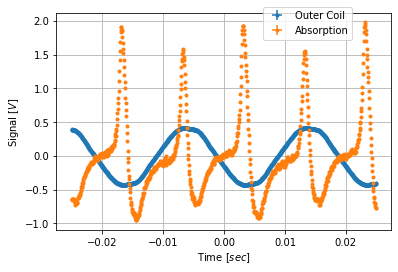

In [3]:
p = pd.read_csv("data/min_mod_1 0.csv", sep=',', header=1, usecols=[3,4,5])

t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend(loc='upper center', bbox_to_anchor=(0.75,1.05))
plt.grid()
plt.show()

V_amp1 = np.max(v1)
V_amp2 = np.min(v1)

V_amp = (V_amp1 + -1*V_amp2)/2

I = V_amp/R 

K1_high = B_res / (mu_0*I)

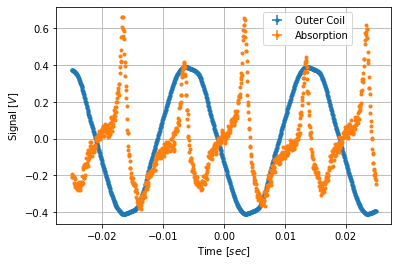

In [4]:
p = pd.read_csv("data/min_mod_2 0.csv", sep=',', header=1, usecols=[3,4,5])

t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

V_amp1 = np.max(v1)
V_amp2 = np.min(v1)

V_amp = (V_amp1 + -1*V_amp2)/2

I = V_amp/R 

K1_low = B_res / (mu_0*I)

plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend(loc='upper center', bbox_to_anchor=(0.75,1.00))
plt.grid()
plt.show()

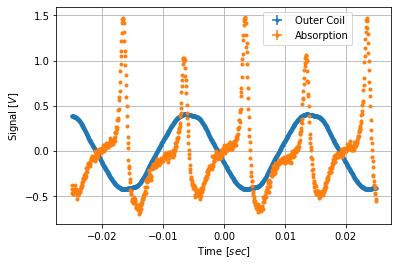

In [5]:

p = pd.read_csv("data/min_mod_3 0.csv", sep=',', header=1, usecols=[3,4,5])

t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

V_amp1 = np.max(v1)
V_amp2 = np.min(v1)

V_amp = (V_amp1 + -1*V_amp2)/2

I = V_amp/R 

K1_mid = B_res / (mu_0*I)

plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend(loc='upper center', bbox_to_anchor=(0.75,1.00))
plt.grid()
plt.show()

In [6]:
K1 = K1_low

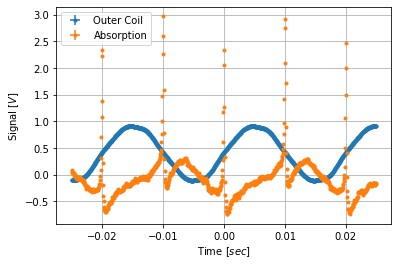

In [7]:

p = pd.read_csv("data/dc_1 0.csv", sep=',', header=1, usecols=[3,4,5])
t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

I = 0.5077 # A, multimeter
V = 11.85 # Volt, around (11.8-11.9)
# A = 0.495-0.52 from dc supply

K2_1 = B_res / (mu_0 * I)
K2 = K2_1
plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend()
plt.grid()
plt.show()

right = np.max(v1)
left = np.min(v1)

mid = (right + left) / 2

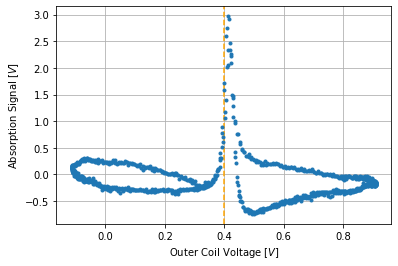

In [8]:
plt.errorbar(v1, v2, 0.001, 0.001, '.', label='')
plt.xlabel(r'Outer Coil Voltage $\left[V\right]$')
plt.ylabel(r'Absorption Signal $\left[V\right]$')
plt.axvline(mid, color='orange', linestyle='dashed')
plt.grid()
plt.show()

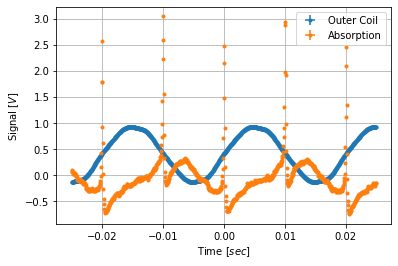

In [110]:
p = pd.read_csv("data/dc_2 0.csv", sep=',', header=1, usecols=[3,4,5])
t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

I = ufloat(0.5046, 0.0001) # A, multimeter
V = ufloat(11.8, 0.05) # Volt, around (11.75-11.85)
# A = 0.495-0.52 from dc supply

K2_2 = B_res / (mu_0 * I)

plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend()
plt.grid()
plt.show()

right = np.max(v1)
left = np.min(v1)

mid = (right + left) / 2


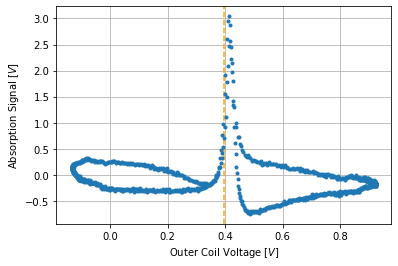

In [111]:
plt.errorbar(v1, v2, 0.001, 0.001, '.', label='')
plt.xlabel(r'Outer Coil Voltage $\left[V\right]$')
plt.ylabel(r'Absorption Signal $\left[V\right]$')
plt.axvline(mid, color='orange', linestyle='dashed')
plt.grid()
plt.show()

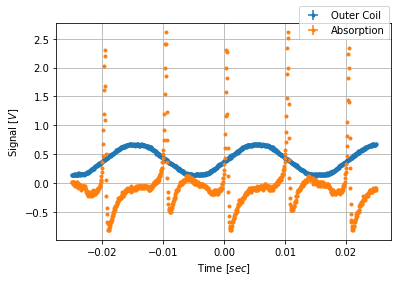

In [9]:

p = pd.read_csv("data/xy_1 0.csv", sep=',', header=1, usecols=[3,4,5])
t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend(bbox_to_anchor=(0.71,0.9))
plt.grid()
plt.show()

I = ufloat(0.5200, 0.0001) # A, pm 0.0001
# power supply 0.513-0.527 A
V = ufloat(12.15, 0.01) # Volts, pm 0.01

K3 = B_res / (mu_0 * I)

right = np.max(v1)
left = np.min(v1)

mid = (right + left) / 2


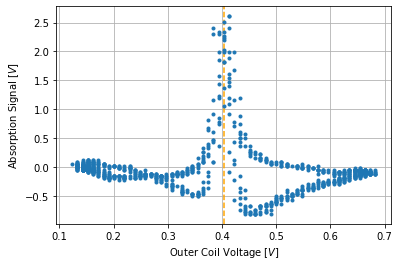

In [10]:

plt.errorbar(v1, v2, 0.001, 0.001, '.', label='')
plt.axvline(mid, color='orange', linestyle='dashed')
plt.xlabel(r'Outer Coil Voltage $\left[V\right]$')
plt.ylabel(r'Absorption Signal $\left[V\right]$')
plt.grid()
plt.show()

In [37]:
c_ratio = 11.5 #pm 1
wavegen_freq = 1000 # hz
wavegen_ampl = 700 #mvpp

# from dc supply
I = np.array([              0.562,  0.558, 0.553,  0.547,  0.539, 0.534,  0.531,  0.527,  0.524, 0.524,  0.518, 0.516,  0.514,  0.511, 0.510, 0.506,  0.504, 0.498, 0.489, 0.485, ])
V = np.array([              13.55,  13.45, 13.33,  13.20,  13.00, 12.89,  12.80,  12.71,  12.65, 12.64,  12.5,  12.45,  12.4,   12.35, 12.30, 12.20,  12.15, 12.0,  11.8,  11.7,  ])

wavegen_ampl = np.array([   3.0,    3.0,   3.0,     2.66,  2.84,  2.9,    2.91,   3.0,    3.0,   3.0,    2.94,  3.0,    2.94,   3.0,   3.0,   2.96,   3.0,   2.94,  2.91,  2.94,  ])*1e-3 # for deltax, mv
phase = np.array([          180,    180,   180,    180,    180,   180,    180,    180,    180,   180,    0,     0,      0,      0,     0,     0,      0,     0,     0,     0,     ]) # for sign
avg_x = np.array([          458.02, 455.0, 450.63, 446.29, 439.8, 435.51, 432.91, 429.54, 427.62,427.06, 422.73,420.87, 419.65, 417.07,415.33,412.85, 410.4, 406.04,398.84,395.77,])*1e-3 # for dc I0, mV
pk_pk = np.array([          0.15,   0.18,  0.24,   0.29,   0.47,  0.60,   0.59,   0.51,   0.38,  0.33,   0.28,  0.42,   0.50,   0.56,  0.57,  0.53,   0.48,  0.37,  0.23,  0.19,  ]) # for deltay, V pm 0.01

In [38]:
d = {
    'I':I,
    'V':V,
    'wavegen_ampl':wavegen_ampl,
    'phase':phase,
    'avg_x':avg_x,
    'pk_pk':pk_pk
}

p = pd.DataFrame(d)

p.to_csv('data/t1.csv')

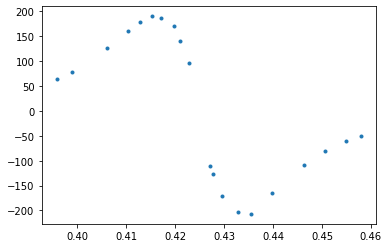

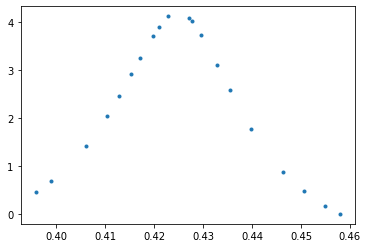

In [202]:
phase[phase == 180] = -1
phase[phase == 0] = 1
df = pk_pk/wavegen_ampl * phase

plt.figure()
plt.plot(avg_x, df, '.')

f = cumtrapz(df, avg_x, initial=0)
plt.figure()
plt.plot(avg_x, f, '.')

In [203]:
v_res_2 = v0 + (v1 - v0)/13 * c_ratio
omega = (v_res_2*2*np.pi).nominal_value

H = K3 * avg_x
B = H*mu_0
v = B*g*mu/h
omega0 = unumpy.nominal_values(v*2*np.pi)

In [204]:
v_res*2*np.pi

616912132.7756941+/-905825.792241191

In [205]:
omega

617854610.5717711

In [206]:
omega0

array([5.43380952e+08, 5.39798116e+08, 5.34613682e+08, 5.29464838e+08,
       5.21765300e+08, 5.16675775e+08, 5.13591214e+08, 5.09593149e+08,
       5.07315320e+08, 5.06650953e+08, 5.01513973e+08, 4.99307326e+08,
       4.97859955e+08, 4.94799122e+08, 4.92734839e+08, 4.89792642e+08,
       4.86886037e+08, 4.81713466e+08, 4.73171606e+08, 4.69529452e+08])

In [207]:
# def P(omega0, chi0, T2, H1, omega):
#     return omega*H1**2*chi0*omega0*T2 / (1 + (omega0-omega)**2*T2**2)

def P(omega0, A, T2, omega):
    return omega*A*omega0*T2 / (1 + (omega0-omega)**2*T2**2)

In [208]:
fit = curve_fit(P, omega0, f, p0=(1,78e-9,np.median(omega0)))

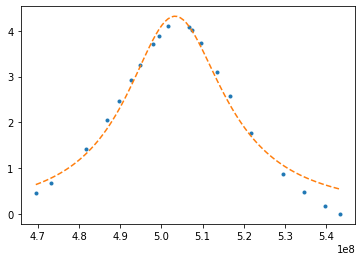

In [209]:
plt.plot(omega0, f, '.')
A, T2, omega = fit[0]
plt.plot(np.linspace(omega0[-1],omega0[0],100), P(np.linspace(omega0[-1],omega0[0],100), A, T2, omega), '--')

In [210]:
T2

6.854226905299165e-08